<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
# Загружаем данные из файла, и посмотрим основную информацю о них
data = pd.read_csv('/datasets/real_estate_data.csv',sep='\t')

data.info()
print(data.columns)
data.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Вывод

1) В названии колонки "cityCenters_nearest" видно нарушение стиля.

2) Количество значений в столбцах различается, соответственно в них есть пропуски. 

3)  Колонки "first_day_exposition",  "is_apartment", "floors_total", "balcony", "parks_around3000", "ponds_around3000",  "days_exposition" не соответствуют типу представленных в них данных.


## Предобработка данных

In [2]:
data = data.rename(columns={'cityCenters_nearest':'city_centers_nearest'}) # переименуем колонку 'cityCenters_nearest'


data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [3]:
data.isna().sum() # Посмотрим количество пропусков


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

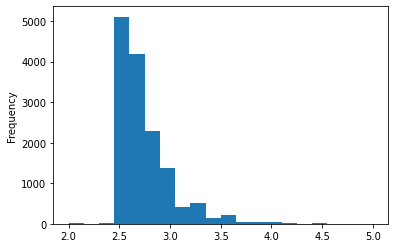

In [4]:
#Посмотрим за из себя представляют данные, посмтроим график. 
data['ceiling_height'].plot(y = 'ceiling_height', kind = 'hist', bins = 20, range=(2,5))
data['ceiling_height'].describe()


Видем аномально большие значения, но их не много. Медиана не сильно отеклоняется от среднего значения.

In [5]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median()) # заполним пропуски медианой значением

Доля пропусков в столбце "floors_total" очень мала, так что можем от них избавиться

In [6]:
data = data.dropna(subset=['floors_total']) # Удаляем строки с пропусками


Пропуски в столбцах "kitchen_area" и "living_area" корректно заполнить мы не можем, так как среднее заначение или медианное будет брать не корректно, так же как и коэффициент отношения жилой площади или площади кухне к общей площади. Оставим значения без изменений. 

Можно предположить что пропуски в столбце "is_apartment" говорят о том что это не апартаменты.

In [7]:
data['is_apartment'] = data['is_apartment'].fillna(False) # Заменим пропуски на False
data['is_apartment'].unique()

array([False,  True])

Так же можно предположить что пропуски в "balcony" означают отсутствие балкона

In [8]:
# Заполним пропуски и сменим типа данных
data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype('int')
data['balcony'].value_counts()

0    15193
1     4195
2     3657
5      304
4      183
3       81
Name: balcony, dtype: int64

Пропущенных значений в "locality_name" мало и причина пропуска скорей всего человеческий фактор, можем избавиться от них

In [9]:
data = data.dropna(subset=['locality_name']) #Удаляем пропущенные занчения 
data['locality_name'].isna().sum()

0

In [10]:
# Посчитаем процент колличества пропусков в колонке "city_centers_nearest" по Санкт-Петербургу
print('Пропущено {:.1%}'.format(data[data['locality_name'] == 'Санкт-Петербург']['city_centers_nearest'].isna().sum() /
      data[data['locality_name'] == 'Санкт-Петербург']['locality_name'].count()))
      

Пропущено 0.4%


Так как доля пропущеных значений колонки "city_centers_nearest" для квартир из Санкт-Петербурга не велика оставим их без изменений.

Столбцы "airports_nearest", "parks_around3000", "parks_nearest", "ponds_around3000", "ponds_nearest" оставим без изменений данны из них нам не понадобятся.        


Для столбца "days_exposition" среднее или медианное значение не подойдут так как пропусков слишком много и такая замена будет занчительно влиять на данные и может исказить дальнейшее исследование, так что заменим пропуски и приведёнм к корректному типу данных.

In [11]:
data['days_exposition'] = data['days_exposition'].fillna(0).astype(int) 

Столбец "first_day_exposition" преобразуем к формату datetime, отбросив время за ненадобностью.

In [12]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')

Столбец floors_total преобразуем к формату целого числа.

In [13]:
data['floors_total'] = data['floors_total'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony         

## Расчёты и добавление результатов в таблицу

Цена квадратного метра квартиры.


In [14]:
data['price_sqm'] = round(data['last_price'] / data['total_area'])

Добавим день недели, месяц и год публикации объявления.

In [15]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

Добавим этаж квартиры; варианты — первый, последний, другой.

In [16]:
# Создадим функцию категоризации этажей
def floors (dp):
    if dp['floor'] == 1:
        return 'первый'
    elif dp['floor'] == dp['floors_total']:
        return 'последний'
    else:
        return 'другой'

data['floor_category'] = data.apply(floors, axis=1)
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sqm,weekday,month,year,floor_category
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,1.0,482.0,2.0,755.0,0,120370.0,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0.0,NaN,0.0,NaN,81,82921.0,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,1.0,90.0,2.0,574.0,558,92786.0,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,...,2.0,84.0,3.0,234.0,424,408176.0,4,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,2.0,112.0,1.0,48.0,121,100000.0,1,6,2018,другой


Добавим соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [17]:
data['ratio_living_total'] =round(data['living_area'] / data['total_area'], 2)

data['ratio_total_kitchen'] = round(data['kitchen_area'] / data['total_area'], 2)

data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_sqm,weekday,month,year,floor_category,ratio_living_total,ratio_total_kitchen
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2.0,755.0,0,120370.0,3,3,2019,другой,0.47,0.23
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0.0,NaN,81,82921.0,1,12,2018,первый,0.46,0.27
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,2.0,574.0,558,92786.0,3,8,2015,другой,0.61,0.15
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,...,3.0,234.0,424,408176.0,4,7,2015,другой,NaN,NaN
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1.0,48.0,121,100000.0,1,6,2018,другой,0.32,0.41


## Исследовательский анализ данных

Изучим следующие параметры: площадь, цена, число комнат, высота потолков.

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

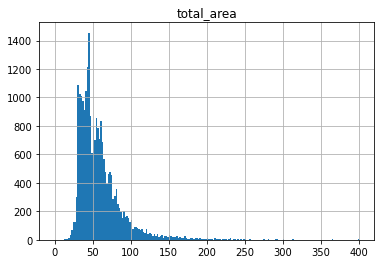

In [18]:
# Визуалезируем данные для наглядности 
data.hist('total_area', bins=200, range=(0,400))
data['total_area'].describe()

Из полученных данных сделаем вывод что распределение нормальное, выбросы есть но они не значительные, средний размер квартиры 60 м2 , медиана 52 м2.

count    23565.000000
mean         6.540058
std         10.910935
min          0.012190
25%          3.400000
50%          4.646000
75%          6.790000
max        763.000000
Name: last_price, dtype: float64

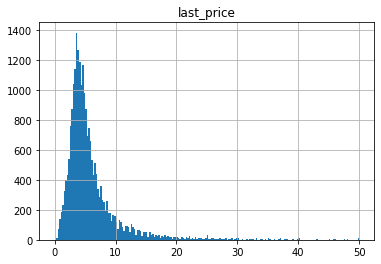

In [19]:
data['last_price'] = data['last_price'] / 1000000 #Для удобства переведём занчения в миллионы

data.hist('last_price', bins=200, range=(0,50)) #Построим гостограмму
data['last_price'].describe()

Распределение нормальное. Среднее цена 6540000, медиана 4646000

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

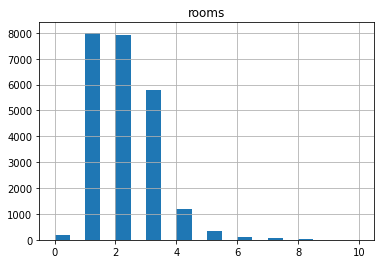

In [20]:
# Визуалезируем данные для наглядности
data.hist('rooms', bins=20, range=(0,10))
data['rooms'].describe()

Распределение нормальное.

count    23565.000000
mean         2.724530
std          0.991026
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

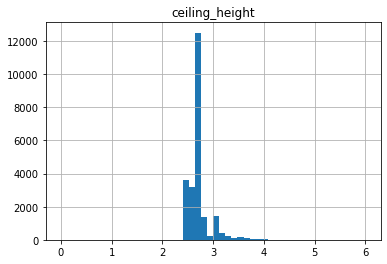

In [21]:
# Визуалезируем данные для наглядности
data.hist('ceiling_height', bins=50, range=(0,6))
data['ceiling_height'].describe()

Распределение нормальное, выбросы есть но их мало.

Изучим время продажи квартиры.

count    23565.000000
mean       156.420115
std        213.517293
min          0.000000
25%         22.000000
50%         73.000000
75%        198.000000
max       1580.000000
Name: days_exposition, dtype: float64

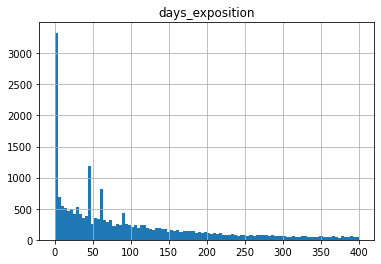

In [22]:
# Визуалезируем данные для наглядности
data.hist('days_exposition', bins=100, range=(0,400))
data['days_exposition'].describe()

Видим выбросы на 45, 60, 90 дней и они значительные. Изучив правила размещения объявлений 
(до 4,5 млн — 45 дней
от 4,5 до 10 млн — 60 дней
от 10 млн — 90 дней)
можем предположить что это скорей всего объявления снятые автоматически за истечением срока давности, также не будем учитывать данные с 0 дней.
Создадим новый датафрэйм с очищенными данными.

In [23]:
# Создадим новый датафрэйм убрав из него не корректные данные
new_data = data.query('days_exposition != 45 and days_exposition != 60 and days_exposition != 90 and days_exposition != 0')

count    18777.000000
mean        59.029201
std         34.541100
min         12.000000
25%         39.500000
50%         50.700000
75%         68.000000
max        900.000000
Name: total_area, dtype: float64


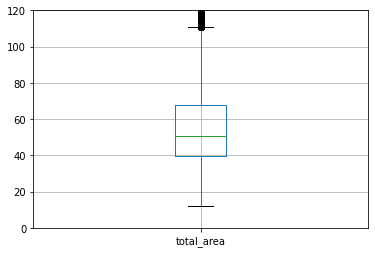

count    18777.000000
mean         2.028972
std          1.060792
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


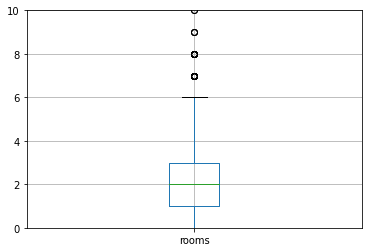

count    18777.000000
mean         6.325486
std         11.186216
min          0.012190
25%          3.400000
50%          4.550000
75%          6.500000
max        763.000000
Name: last_price, dtype: float64


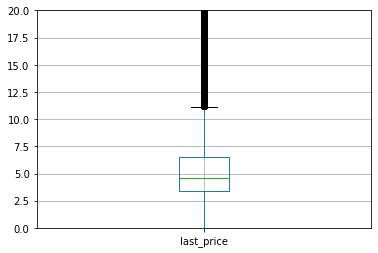

In [24]:
# Построим диагрмму размаха площади 
new_data.boxplot('total_area')
plt.ylim(0,120)
print(new_data['total_area'].describe())
plt.show()

# Построим диагрмму размаха количества комнат 
new_data.boxplot('rooms')
plt.ylim(0,10)
print(new_data['rooms'].describe())
plt.show()

# Построим диагрмму размаха последней цены
new_data.boxplot('last_price')
plt.ylim(0,20)
print(new_data['last_price'].describe())
plt.show()


Исходя их диограм размаха отсеим аномальные данные

In [25]:
new_data = new_data.query('10 < total_area < 110 and rooms <= 6 and last_price <= 11')

count    17042.000000
mean       181.100458
std        214.166881
min          1.000000
25%         39.000000
50%        104.000000
75%        236.000000
max       1580.000000
Name: days_exposition, dtype: float64

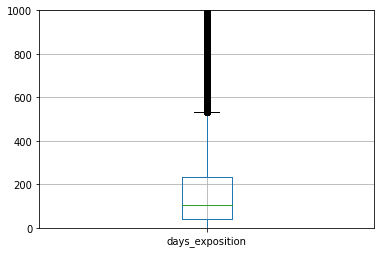

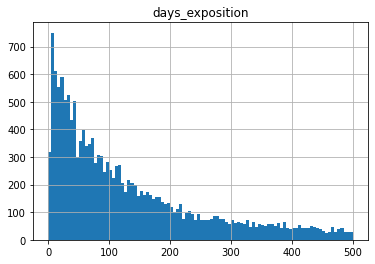

In [26]:

# Построим диагрмму размаха
new_data.boxplot('days_exposition')
plt.ylim(0,1000)
# Посмтрим гистограмму
new_data.hist('days_exposition', bins=100, range=(0,500))
new_data['days_exposition'].describe()

Середняя продолжительность продажи составляет 181 день , в то время как медианно значение 104 дней, Нормальным считается значения от 1 до 575 дней.

Выясним какие факторы больше всего влияют на стоимость квартиры. Изучим, зависит ли цена от площади, числа комнат, удалённости от центра. Изучис зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучим зависимость от даты размещения: дня недели, месяца и года.

0.6536213939252805

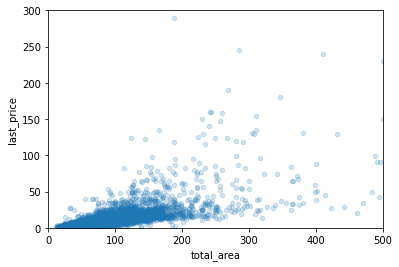

In [27]:
#построим график разброса
data.plot(x='total_area', y='last_price', kind = 'scatter', alpha=0.2)
plt.xlim(0,500)
plt.ylim(0,300)
# Посчитаем коэффициент Пирсона
data['total_area'].corr(data['last_price'])

Из полученной диаграммы рассеяния и коэффициент Пирсона 0.65 видим что зависимость есть и занчительная.

0.3669269184120539

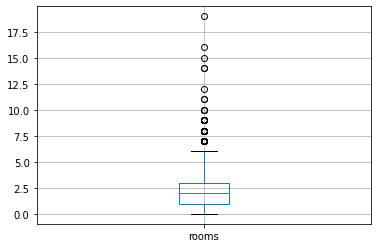

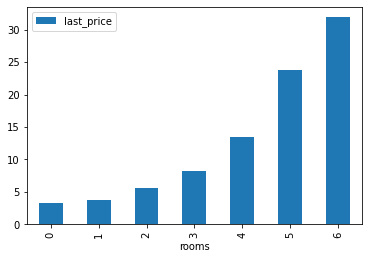

In [28]:
#построим Series где индыксы это кол-во комнат, а значения средняя цена квартиры
pivot_rooms_price = data.pivot_table(index='rooms', values='last_price') 

data.boxplot('rooms') # на ящике с усами посмотрим какие данные можно считать корректными

pivot_rooms_price.query('index < 7').plot(kind='bar') # посмотроим гистрограмму для наглядности 


data.query('rooms < 7')['rooms'].corr(data['last_price'])# посчитаем коэффициент Пирсона

Рост цены наблюдается но точно утверждать об имеющйся зависимости мы не можем, коэффициент Пирсона 0.36.

-0.3214400496577961

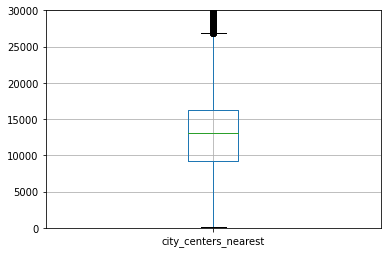

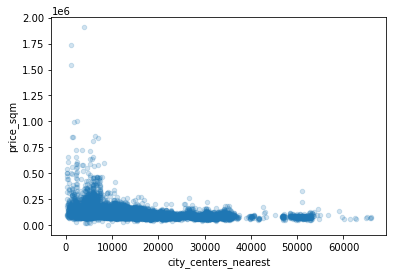

In [29]:
data.boxplot('city_centers_nearest') # на ящике с усами посмотрим какие данные можно считать корректными
plt.ylim(0,30000)
data.plot(x='city_centers_nearest', y='price_sqm', kind = 'scatter', alpha=0.2)
# Посчитаем коэффициент Пирсона
data.query('city_centers_nearest<26850')['city_centers_nearest'].corr(data['price_sqm'])


В данном случа ожидаемо имеется отрицательная зависимость , чем дальше от центра тем ниже цена за квадратный метр согласно коэффициенту Пирсона -0.32

,price_sqm
floor_category,
другой,103486.316461
первый,82001.604331
последний,93378.959159


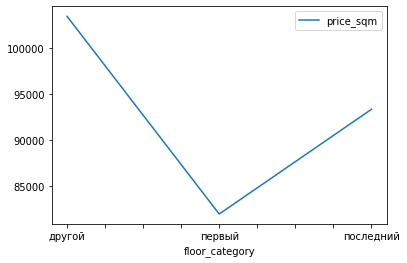

In [30]:
#построим Series где индыксы это категория этажа, а значения средняя цена квартного метра
pivot_floor_price = data.pivot_table(index='floor_category', values='price_sqm') 

pivot_floor_price.query('floor_category').plot() # посмотроим график для наглядности 
pivot_floor_price

Квартиры на первом этаже самые дешовые, дороже квартиры на последнем, самые дорогоие кровартиры из категории другой.

Разница между самой большой и самой маленьекой ценой по дням недели:2.1%
Разница между самой большой и самой маленьекой ценой по месяцам:4.1%
Разница между самой большой и самой маленьекой ценой по годам:13.7%


<AxesSubplot:xlabel='year'>

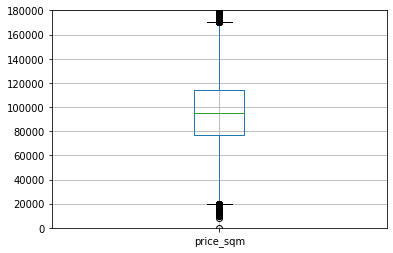

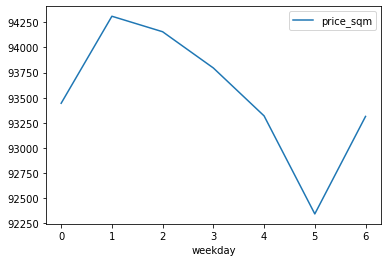

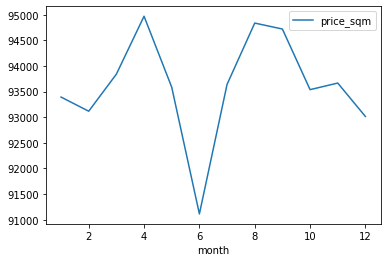

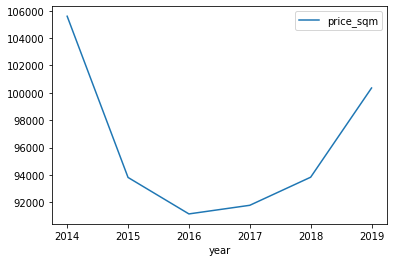

In [31]:
data.boxplot('price_sqm') # Посмотрм какие данные можно считать крректными
plt.ylim(0,180000)
# Посмотрим среднюю цену км2 за каждый день недели
data_pivot_weelday = data.query('20000<price_sqm<170000').pivot_table(index='weekday', values='price_sqm')

print('Разница между самой большой и самой маленьекой ценой по дням недели:{:.1%}'.format((data_pivot_weelday['price_sqm'].max()-
                                                                           data_pivot_weelday['price_sqm'].min())/
                                                                           data_pivot_weelday['price_sqm'].max()
                                                                          ))
data_pivot_weelday.plot() # Для наглядности построим график

data_pivot_month = data.query('20000<price_sqm<170000').pivot_table(index='month', values='price_sqm')
print('Разница между самой большой и самой маленьекой ценой по месяцам:{:.1%}'.format((data_pivot_month['price_sqm'].max()-
                                                                           data_pivot_month['price_sqm'].min())/
                                                                           data_pivot_month['price_sqm'].max()
                                                                          ))
data_pivot_month.plot()

data_pivot_year = data.query('20000<price_sqm<170000').pivot_table(index='year', values='price_sqm')
print('Разница между самой большой и самой маленьекой ценой по годам:{:.1%}'.format((data_pivot_year['price_sqm'].max()-
                                                                           data_pivot_year['price_sqm'].min())/
                                                                           data_pivot_year['price_sqm'].max()
                                                                          ))
data_pivot_year.plot()

При размещение объявления в вторник цена самая большая в то время как в субботу сама низкая,в целом откланение составляет 2.1%.
Самая большая цена в апреле и августе , самая низка в июне, разница между самой большой и самой низкой ценой 4.1%.
Самый большие цены были в 2014 затем снижались вплоть до 2016 и далее только росли. Можно предположить что такое поведение связанно с повышением ключевой ставки в 2014 и падением курса рубля в результате чего цены выросли а покупательская способность снизилась, что привело к падению цен. В дальнейшем ключевая ставка падала и рубль стал более надёжным так же появлялись льготные ипотеки что привело к повышению покупательской способности и соответственно росту цен.Разница между максимальной и минимальной ценами 13.7%

In [32]:
#Выделим топ 10 насёлнных пунктов пол колличеству объявлений
data_pivot_locality = (data.pivot_table(index='locality_name', values='price_sqm', aggfunc=('mean','count'))
                       .sort_values('count', ascending=False)
                      [:10])
                       
data_pivot_locality

,count,mean
locality_name,,
Санкт-Петербург,15651,114868.874257
посёлок Мурино,520,85673.253846
посёлок Шушары,439,78551.359909
Всеволожск,398,68654.474874
Пушкин,369,103125.818428
Колпино,338,75424.571006
посёлок Парголово,327,90175.886850
Гатчина,307,68746.110749
деревня Кудрово,299,92473.588629


Самые дорогие квартиры из десятка самых популярных населённых пунктов в Санкт-Петербурге самые дешевые Выборге

Изучим предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделим квартиры в Санкт-Петербурге (locality_name). Наша задача — выяснить, какая область входит в центр.

<AxesSubplot:xlabel='city_centers_nearest_km'>

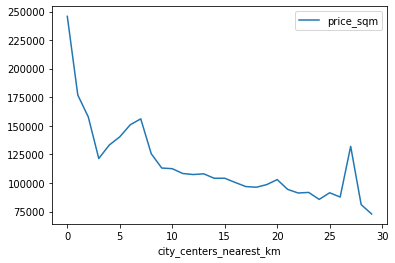

In [33]:
data['city_centers_nearest_km'] = round(data['city_centers_nearest'] / 1000) # Добавим столбец с расстоянием в км от центра 

# Делаем сводную таблицу с срезом по Санкт-Петербургу
data_pivot_centers_nearest = (data.query('locality_name == "Санкт-Петербург"')
                              .pivot_table(index='city_centers_nearest_km', values='price_sqm')) 
# построим график
data_pivot_centers_nearest.plot()


График сильно меняется на 7 километре так что будем считать за центр область с радиусом в 3 км 

count    3518.000000
mean       93.083411
std        59.429173
min        12.000000
25%        56.925000
50%        78.600000
75%       110.000000
max       631.200000
Name: total_area, dtype: float64


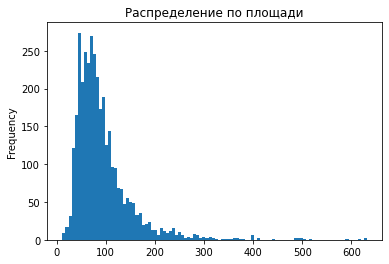

count    3518.000000
mean       14.888089
std        24.340473
min         1.600000
25%         6.667500
50%         9.200000
75%        14.497500
max       763.000000
Name: last_price, dtype: float64


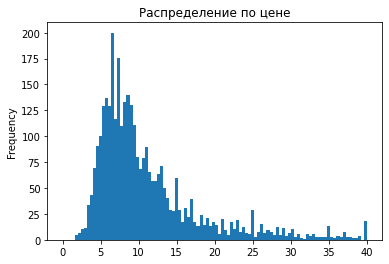

count    3518.000000
mean        2.833712
std         1.450317
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max        19.000000
Name: rooms, dtype: float64


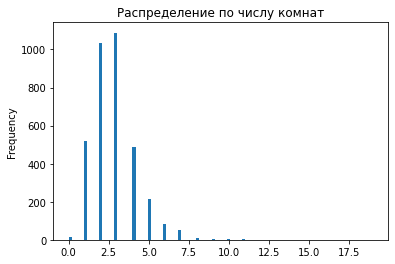

count    3518.000000
mean        2.833712
std         1.450317
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max        19.000000
Name: rooms, dtype: float64


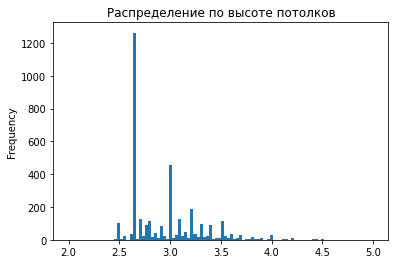

In [34]:
data_centr = data.query('city_centers_nearest_km <= 7 and locality_name == "Санкт-Петербург"')
data_centr['total_area'].plot(kind='hist', bins=100, title='Распределение по площади')
print(data_centr['total_area'].describe())
plt.show()

data_centr['last_price'].plot(kind='hist', bins=100, title='Распределение по цене',range=(0,40))
print(data_centr['last_price'].describe())       
plt.show()

data_centr['rooms'].plot(kind='hist', bins=100, title='Распределение по числу комнат')
print(data_centr['rooms'].describe())       
plt.show()

data_centr['ceiling_height'].plot(kind='hist', bins=100, title='Распределение по высоте потолков',range=(2,5))
print(data_centr['rooms'].describe())       
plt.show()
                             

Коэффициент Пирсона для количества комнат: 0.26955227992107816


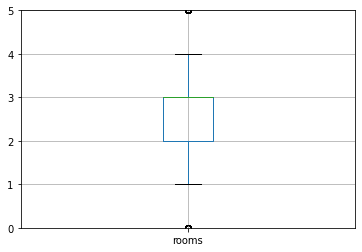

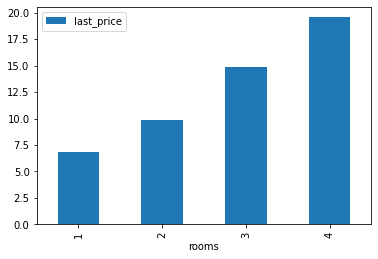

Коэффициент Пирсона удалённости от центра: -0.01747422189857633


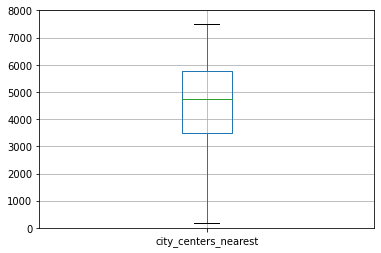

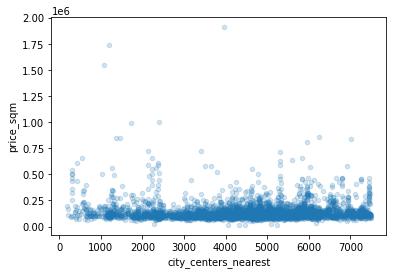

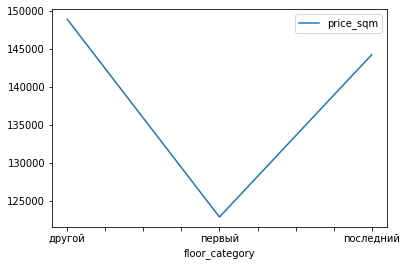

,price_sqm
floor_category,
другой,148927.818690
первый,122900.825974
последний,144264.189189


In [35]:
#построим Series где индыксы это кол-во комнат, а значения средняя цена квартиры
pivot_rooms_price_centr = data_centr.pivot_table(index='rooms', values='last_price') 

data_centr.boxplot('rooms') # на ящике с усами посмотрим какие данные можно считать корректными
plt.ylim(0,5)
pivot_rooms_price_centr.query(' 1<= index <= 4').plot(kind='bar') # посмотроим гистрограмму для наглядности 

# посчитаем коэффициент Пирсона
print('Коэффициент Пирсона для количества комнат:',
      data_centr.query('1<= rooms <= 4')['rooms'].corr(data_centr['last_price']))
plt.show()


data_centr.boxplot('city_centers_nearest') # на ящике с усами посмотрим какие данные можно считать корректными
plt.ylim(0,8000)
data_centr.plot(x='city_centers_nearest', y='price_sqm', kind = 'scatter', alpha=0.2)

# посчитаем коэффициент Пирсона
print('Коэффициент Пирсона удалённости от центра:',
      data_centr.query('city_centers_nearest<7500')['city_centers_nearest'].corr(data_centr['price_sqm']))
plt.show()

#построим Series где индексы это категория этажа, а значения средняя цена квартного метра
pivot_floor_price_centr = data_centr.pivot_table(index='floor_category', values='price_sqm') 

pivot_floor_price_centr.query('floor_category').plot() # посмотроим график для наглядности 
plt.show()
pivot_floor_price_centr

Данные из центра очень схожи с общеми данными, однако различия всё таки есть. Коэффициент Пирсона для комнат слегка отличается 
0.27 для центра и 0.366 для общих данных. Коэффициент Пирсона для удалённости от центра также отличается -0.02 для центра и -0.32 для общих данных. По этажам всё тоже , самы дешёвые квартиры на первом этаже, самые дорогие из котегории дргой этаж , между ними квартиры на последнем этаже. 

Разница между самой большой и самой маленьекой ценой по дням недели:5.1%
Разница между самой большой и самой маленьекой ценой по месяцам:5.3%
Разница между самой большой и самой маленьекой ценой по годам:11.7%


<AxesSubplot:xlabel='year'>

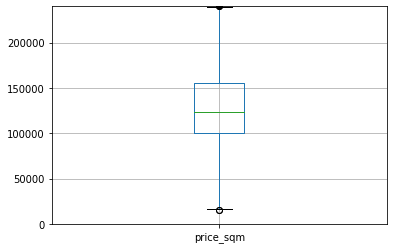

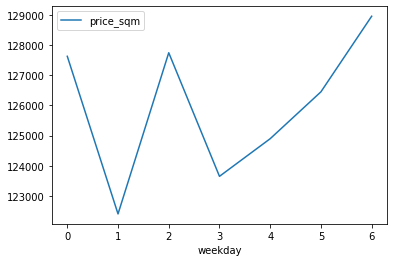

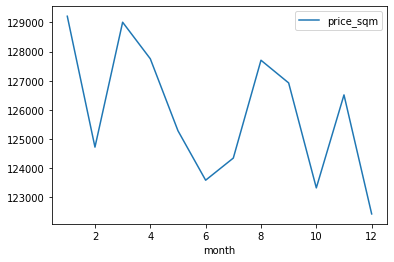

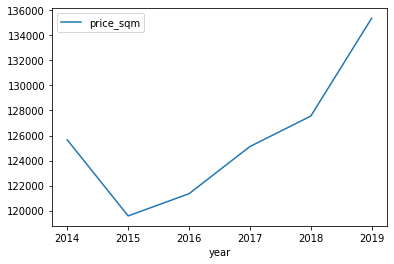

In [36]:
data_centr.boxplot('price_sqm') # Посмотрм какие данные можно считать крректными
plt.ylim(0,240000)
# Посмотрим среднюю цену км2 за каждый день недели
data_centr_pivot_weelday = data_centr.query('20000<price_sqm<235000').pivot_table(index='weekday', values='price_sqm')

print('Разница между самой большой и самой маленьекой ценой по дням недели:{:.1%}'.format((data_centr_pivot_weelday['price_sqm'].max()-
                                                                           data_centr_pivot_weelday['price_sqm'].min())/
                                                                           data_centr_pivot_weelday['price_sqm'].max()
                                                                         ))
data_centr_pivot_weelday.plot() # Для наглядности построим график

data_centr_pivot_month = data_centr.query('20000<price_sqm<240000').pivot_table(index='month', values='price_sqm')
print('Разница между самой большой и самой маленьекой ценой по месяцам:{:.1%}'.format((data_centr_pivot_month['price_sqm'].max()-
                                                                           data_centr_pivot_month['price_sqm'].min())/
                                                                           data_centr_pivot_month['price_sqm'].max()
                                                                          ))
data_centr_pivot_month.plot()

data_centr_pivot_year = data_centr.query('20000<price_sqm<240000').pivot_table(index='year', values='price_sqm')
print('Разница между самой большой и самой маленьекой ценой по годам:{:.1%}'.format((data_centr_pivot_year['price_sqm'].max()-
                                                                           data_centr_pivot_year['price_sqm'].min())/
                                                                           data_centr_pivot_year['price_sqm'].max()
                                                                          ))
data_centr_pivot_year.plot()

По дням недели, самые высокие цены в воскресенье самые низкие в вторник разница в цене 5.1% , но график в целом не однородный и отличается от графика по общим данным. Нельзя хоть как то использовать полученные даные. 
По месяцам, самые низкие цены в декабре самые высокие в январе, разница между ними 5.3%, график так же сильно отличается от графика по общим данным, имеется общая тенденция падения цен летом. 
По годам данные довольно схожи, самые высокие цены были в 2014 затем резкий спад с дальнейшим ростом, причины такого поведения думаю схожи. 

## Общий вывод

Мы изучили данные , очистили их от не корректных значений и заполнили пропуски по мере возможности , так же изменили типы данных на корректные для удобно работы. Из изученных данных мы выяснили  факторы влияющие на цену. В большей стеапени на цену влияет площадь квартиры, количество комнта и удалённость от ценра влияет но мы не можем точно утверждать о такой тенденции. Так же есть зависимость от времяни года, летом квартиры немного дешевле, а так же в конце года хотя и точно это утверждать нельзя так как мы расчитывали стоимость отталкиваясь от последней цены, а время года брали из времяни размещения объявлений, а как мы выяснили ранее продаваться квартира будет в среднем 181 день и цена могла меняться. Так же выснили что с годами цена значительно менялась, и во времена кризиса падала а в благополучное время росла. 
